In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [12]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
X_train = df[['carat', 'depth', 'price']]
X_train.head()

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [ ]:
# DBSCAN Clustering
DBS_clustering = DBSCAN(eps=1.3, min_samples=5).fit(X_scaled)
df['Cluster'] = DBS_clustering.labels_

Number of outliers detected: 21


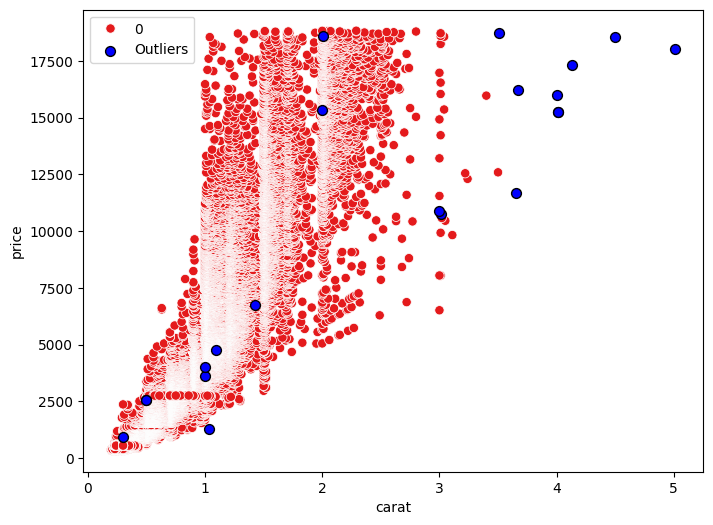

In [8]:
# Identify outliers
outliers = df[df['Cluster'] == -1]
print(f"Number of outliers detected: {len(outliers)}")

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='price',
                data=df[df['Cluster'] != -1],
                hue='Cluster', palette='Set1', legend='full', s=45)
plt.scatter(outliers['carat'], outliers['price'], s=50, label='Outliers', c='blue', edgecolors='black')
plt.legend()
plt.show()